In [1]:
from pathlib import Path

data_dir = Path("../data")

In [2]:
import geopandas as gpd

hel_gdansk_data_dir = data_dir / "raw" / "shapefile" / "emodnet" / "hel_gdansk_data"

gdf = gpd.read_file(hel_gdansk_data_dir / "coastal_type_20210501_0_80k.shp")

In [3]:
gdf.head()

,id,fid,morpho,coasttype,geometry
0,10282,10282.0,G,"Muddy coastline, including tidal flat, salt marsh","LINESTRING (18.43422 54.713, 18.4348 54.7122, ..."
1,10283,10283.0,K,Artificial beach,"LINESTRING (18.41875 54.72184, 18.41944 54.721..."
2,10284,10284.0,G,"Muddy coastline, including tidal flat, salt marsh","LINESTRING (18.41222 54.72291, 18.41396 54.722..."
3,10285,10285.0,E,Sand beach fronting upland (> 1 Km long),"LINESTRING (18.47228 54.6934, 18.4721 54.69301..."
4,10286,10286.0,G,"Muddy coastline, including tidal flat, salt marsh","LINESTRING (18.41873 54.77189, 18.41752 54.769..."


In [4]:
list(gdf.coasttype.unique())

['Muddy coastline, including tidal flat, salt marsh',
 'Artificial beach',
 'Sand beach fronting upland (> 1 Km long)',
 'Beach, unspecified',
 'Vegetated (?green?) beach',
 'Beach that is part of extensive non-cohesive sedimentary systems (barrier, spit, tombolo)',
 'Artificial shoreline (walk, dike, quay) without beach',
 'Harbor area']

In [5]:
mapping = {
    "Muddy coastline, including tidal flat, salt marsh": "Muddy coastline",
    "Artificial beach": "Artificial beach",
    "Sand beach fronting upland (> 1 Km long)": "Beach",
    "Beach, unspecified": "Beach",
    "Vegetated (?green?) beach": "Beach",
    "Beach that is part of extensive non-cohesive sedimentary systems (barrier, spit, tombolo)": "Beach",
    "Artificial shoreline (walk, dike, quay) without beach": "Artificial shoreline",
    "Harbor area": "Harbor",
}

gdf["coasttype"] = gdf.coasttype.map(mapping)

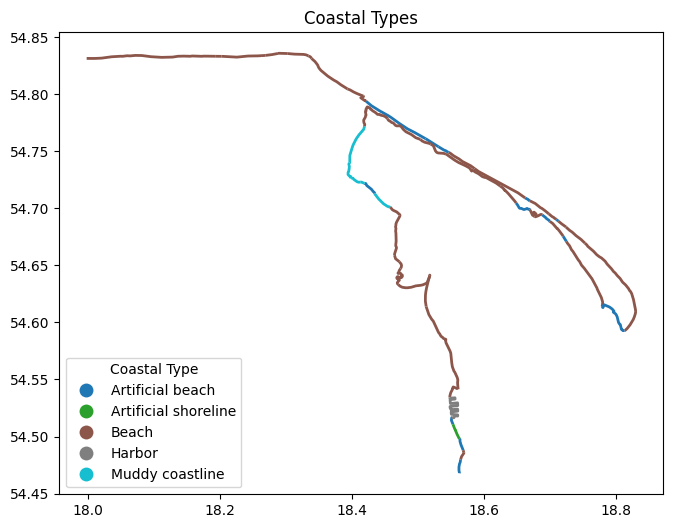

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))
gdf.plot(
    column="coasttype",
    linewidth=2,
    ax=ax,
    legend=True,
    cmap="tab10",
    legend_kwds={"loc": "lower left", "title": "Coastal Type"},
)
plt.title("Coastal Types")
plt.show()

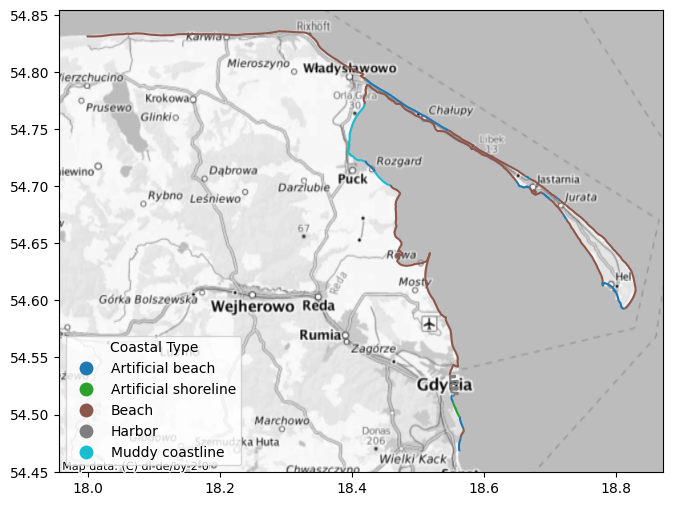

In [7]:
import contextily as ctx
import xyzservices.providers as xyz

fig, ax = plt.subplots(figsize=(12, 6))
gdf.plot(
    column="coasttype", ax=ax, legend=True, cmap="tab10", legend_kwds={"loc": "lower left", "title": "Coastal Type"}
)

# ctx.add_basemap(ax, crs=gdf.crs, source=ctx.providers.CartoDB.Voyager)
ctx.add_basemap(ax, crs=gdf.crs, source=xyz.TopPlusOpen.Grey)
plt.show()